In [1]:
import pandas as pd
from database.market import Market
from datetime import datetime,timedelta
from parameters.parameters import Parameters
from backtester.backtester_lite import BacktesterLite
from processor.processor import Processor as p
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
market = Market()

In [3]:
market.connect()
sp500 = market.retrieve("sp500").rename(columns={"Symbol":"ticker"})
market.disconnect()

In [4]:
start_date = datetime(2001,1,1)
end_date = datetime(2020,1,1)
lookbacks = [5,60]
holding_periods = [1,5,20]
floors = [-10,0]
ceilings = [1,10]
volatilities = [0.1,0.5,1]
positions = 20
tickers = sp500["ticker"]
asset = "stocks"
# positions = 1
# tickers = ["BTC"]
# asset = "crypto"

In [5]:
parameters = Parameters.parameters_lite(lookbacks,holding_periods,ceilings,floors,volatilities)

In [6]:
len(parameters)

288

In [7]:
simulation = []
market.connect()
for ticker in tqdm(tickers):
    try:
        ticker_data = market.retrieve_ticker_prices(asset,ticker)
        ticker_data = p.column_date_processing(ticker_data)
        ticker_data.sort_values("date",inplace=True)
        ticker_data["week"] = [x.week for x in ticker_data["date"]]
        ticker_data["day"] = [x.weekday() for x in ticker_data["date"]]
        ticker_data["prev_close"] = ticker_data["adjclose"].shift(1)
        for lookback in lookbacks:
            ticker_data[f"window_{lookback}"] = ticker_data["prev_close"].shift(lookback)
            ticker_data[f"rolling_{lookback}"] = ticker_data["prev_close"].rolling(lookback).mean()
            ticker_data[f"rolling_stdev_{lookback}"] = ticker_data["prev_close"].rolling(lookback).std()
            ticker_data[f"rolling_pct_stdev_{lookback}"] = ticker_data[f"rolling_stdev_{lookback}"] / ticker_data[f"rolling_{lookback}"]
        for holding_period in holding_periods:
            ticker_data[f"return_{holding_period}"] = (ticker_data["adjclose"].shift(-holding_period) - ticker_data["adjclose"]) / ticker_data["adjclose"]
        simulation.append(ticker_data.dropna())
    except Exception as e:
        print(ticker,str(e))
market.disconnect()
final = pd.concat(simulation)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 489/489 [00:44<00:00, 11.07it/s]


In [8]:
final = pd.concat(simulation)

In [9]:
all_trades = []
for iteration in tqdm(range(len(parameters))):
    try:
        parameter = parameters[iteration]
        trades = BacktesterLite.backtest(positions,final.copy(),iteration,parameter,False)
        all_trades.append(trades)
    except Exception as e:
        print(str(e))

 50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 145/288 [06:16<03:22,  1.41s/it]

'window_pct_stdev_5'


 51%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 146/288 [06:17<02:46,  1.17s/it]

'window_pct_stdev_5'


 51%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 147/288 [06:17<02:20,  1.00it/s]

'window_pct_stdev_5'


 51%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 148/288 [06:18<02:03,  1.14it/s]

'window_pct_stdev_5'


 52%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 149/288 [06:18<01:50,  1.25it/s]

'window_pct_stdev_5'


 52%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 150/288 [06:19<01:42,  1.34it/s]

'window_pct_stdev_5'


 52%|████████████████████████████████████████████████████████████████████████████████████████                                                                                | 151/288 [06:20<01:37,  1.41it/s]

'window_pct_stdev_5'


 53%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 152/288 [06:20<01:31,  1.48it/s]

'window_pct_stdev_5'


 53%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 153/288 [06:21<01:28,  1.53it/s]

'window_pct_stdev_5'


 53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 154/288 [06:22<01:25,  1.57it/s]

'window_pct_stdev_5'


 54%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 155/288 [06:22<01:23,  1.60it/s]

'window_pct_stdev_5'


 54%|███████████████████████████████████████████████████████████████████████████████████████████                                                                             | 156/288 [06:23<01:21,  1.62it/s]

'window_pct_stdev_5'


 55%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 157/288 [06:23<01:20,  1.64it/s]

'window_pct_stdev_5'


 55%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 158/288 [06:24<01:19,  1.64it/s]

'window_pct_stdev_5'


 55%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 159/288 [06:25<01:18,  1.65it/s]

'window_pct_stdev_5'


 56%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 160/288 [06:25<01:17,  1.65it/s]

'window_pct_stdev_5'


 56%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 161/288 [06:26<01:16,  1.66it/s]

'window_pct_stdev_5'


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 162/288 [06:26<01:15,  1.66it/s]

'window_pct_stdev_5'


 57%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 163/288 [06:27<01:15,  1.66it/s]

'window_pct_stdev_5'


 57%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 164/288 [06:28<01:14,  1.66it/s]

'window_pct_stdev_5'


 57%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 165/288 [06:28<01:13,  1.66it/s]

'window_pct_stdev_5'


 58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 166/288 [06:29<01:13,  1.66it/s]

'window_pct_stdev_5'


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 167/288 [06:29<01:12,  1.66it/s]

'window_pct_stdev_5'


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 168/288 [06:30<01:11,  1.67it/s]

'window_pct_stdev_5'


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 169/288 [06:31<01:11,  1.67it/s]

'window_pct_stdev_5'


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 170/288 [06:31<01:10,  1.67it/s]

'window_pct_stdev_5'


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 171/288 [06:32<01:10,  1.67it/s]

'window_pct_stdev_5'


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 172/288 [06:32<01:12,  1.60it/s]

'window_pct_stdev_5'


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 173/288 [06:33<01:10,  1.62it/s]

'window_pct_stdev_5'


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 174/288 [06:34<01:09,  1.63it/s]

'window_pct_stdev_5'


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 175/288 [06:34<01:08,  1.65it/s]

'window_pct_stdev_5'


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 176/288 [06:35<01:08,  1.63it/s]

'window_pct_stdev_5'


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 177/288 [06:35<01:07,  1.63it/s]

'window_pct_stdev_5'


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 178/288 [06:36<01:06,  1.64it/s]

'window_pct_stdev_5'


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 179/288 [06:37<01:06,  1.64it/s]

'window_pct_stdev_5'


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 180/288 [06:37<01:05,  1.65it/s]

'window_pct_stdev_5'


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 181/288 [06:38<01:04,  1.66it/s]

'window_pct_stdev_60'


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 182/288 [06:38<01:03,  1.66it/s]

'window_pct_stdev_60'


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 183/288 [06:39<01:03,  1.66it/s]

'window_pct_stdev_60'


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 184/288 [06:40<01:02,  1.66it/s]

'window_pct_stdev_60'


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 185/288 [06:40<01:03,  1.62it/s]

'window_pct_stdev_60'


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 186/288 [06:41<01:03,  1.61it/s]

'window_pct_stdev_60'


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 187/288 [06:42<01:02,  1.61it/s]

'window_pct_stdev_60'


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 188/288 [06:42<01:01,  1.62it/s]

'window_pct_stdev_60'


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 189/288 [06:43<01:00,  1.63it/s]

'window_pct_stdev_60'


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 190/288 [06:43<01:00,  1.61it/s]

'window_pct_stdev_60'


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 191/288 [06:44<01:00,  1.60it/s]

'window_pct_stdev_60'


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 192/288 [06:45<00:59,  1.61it/s]

'window_pct_stdev_60'


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 193/288 [06:45<00:58,  1.62it/s]

'window_pct_stdev_60'


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 194/288 [06:46<00:57,  1.63it/s]

'window_pct_stdev_60'


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 195/288 [06:46<00:57,  1.62it/s]

'window_pct_stdev_60'


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 196/288 [06:47<00:56,  1.63it/s]

'window_pct_stdev_60'


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 197/288 [06:48<00:55,  1.64it/s]

'window_pct_stdev_60'


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 198/288 [06:48<00:54,  1.64it/s]

'window_pct_stdev_60'


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 199/288 [06:49<00:54,  1.64it/s]

'window_pct_stdev_60'


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 200/288 [06:49<00:53,  1.65it/s]

'window_pct_stdev_60'


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 201/288 [06:50<00:52,  1.65it/s]

'window_pct_stdev_60'


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 202/288 [06:51<00:51,  1.65it/s]

'window_pct_stdev_60'


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 203/288 [06:51<00:51,  1.64it/s]

'window_pct_stdev_60'


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 204/288 [06:52<00:50,  1.65it/s]

'window_pct_stdev_60'


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 205/288 [06:53<00:50,  1.65it/s]

'window_pct_stdev_60'


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 206/288 [06:53<00:49,  1.65it/s]

'window_pct_stdev_60'


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 207/288 [06:54<00:48,  1.65it/s]

'window_pct_stdev_60'


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 208/288 [06:54<00:48,  1.66it/s]

'window_pct_stdev_60'


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 209/288 [06:55<00:49,  1.60it/s]

'window_pct_stdev_60'


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 210/288 [06:56<00:49,  1.58it/s]

'window_pct_stdev_60'


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 211/288 [06:56<00:48,  1.60it/s]

'window_pct_stdev_60'


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 212/288 [06:57<00:46,  1.62it/s]

'window_pct_stdev_60'


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 213/288 [06:57<00:45,  1.63it/s]

'window_pct_stdev_60'


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 214/288 [06:58<00:45,  1.63it/s]

'window_pct_stdev_60'


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 215/288 [06:59<00:44,  1.64it/s]

'window_pct_stdev_60'


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 216/288 [06:59<00:43,  1.65it/s]

'window_pct_stdev_60'


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 217/288 [07:00<00:42,  1.66it/s]

'window_pct_stdev_5'


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 218/288 [07:01<00:43,  1.62it/s]

'window_pct_stdev_5'


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 219/288 [07:01<00:42,  1.61it/s]

'window_pct_stdev_5'


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 220/288 [07:02<00:42,  1.62it/s]

'window_pct_stdev_5'


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 221/288 [07:02<00:41,  1.62it/s]

'window_pct_stdev_5'


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 222/288 [07:03<00:40,  1.64it/s]

'window_pct_stdev_5'


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 223/288 [07:04<00:39,  1.65it/s]

'window_pct_stdev_5'


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 224/288 [07:04<00:38,  1.65it/s]

'window_pct_stdev_5'


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 225/288 [07:05<00:37,  1.66it/s]

'window_pct_stdev_5'


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 226/288 [07:05<00:37,  1.66it/s]

'window_pct_stdev_5'


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 227/288 [07:06<00:36,  1.66it/s]

'window_pct_stdev_5'


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 228/288 [07:07<00:37,  1.60it/s]

'window_pct_stdev_5'


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 229/288 [07:07<00:37,  1.59it/s]

'window_pct_stdev_5'


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 230/288 [07:08<00:36,  1.60it/s]

'window_pct_stdev_5'


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 231/288 [07:09<00:36,  1.58it/s]

'window_pct_stdev_5'


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 232/288 [07:09<00:34,  1.61it/s]

'window_pct_stdev_5'


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 233/288 [07:10<00:33,  1.63it/s]

'window_pct_stdev_5'


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 234/288 [07:10<00:33,  1.63it/s]

'window_pct_stdev_5'


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 235/288 [07:11<00:32,  1.63it/s]

'window_pct_stdev_5'


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 236/288 [07:12<00:31,  1.64it/s]

'window_pct_stdev_5'


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 237/288 [07:12<00:31,  1.64it/s]

'window_pct_stdev_5'


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 238/288 [07:13<00:30,  1.65it/s]

'window_pct_stdev_5'


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 239/288 [07:13<00:29,  1.65it/s]

'window_pct_stdev_5'


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 240/288 [07:14<00:28,  1.66it/s]

'window_pct_stdev_5'


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 241/288 [07:15<00:28,  1.66it/s]

'window_pct_stdev_5'


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 242/288 [07:15<00:27,  1.67it/s]

'window_pct_stdev_5'


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 243/288 [07:16<00:26,  1.67it/s]

'window_pct_stdev_5'


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 244/288 [07:16<00:26,  1.66it/s]

'window_pct_stdev_5'


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 245/288 [07:17<00:25,  1.67it/s]

'window_pct_stdev_5'


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 246/288 [07:18<00:25,  1.67it/s]

'window_pct_stdev_5'


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 247/288 [07:18<00:24,  1.67it/s]

'window_pct_stdev_5'


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 248/288 [07:19<00:23,  1.67it/s]

'window_pct_stdev_5'


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 249/288 [07:19<00:23,  1.67it/s]

'window_pct_stdev_5'


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 250/288 [07:20<00:23,  1.65it/s]

'window_pct_stdev_5'


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 251/288 [07:21<00:22,  1.64it/s]

'window_pct_stdev_5'


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 252/288 [07:21<00:22,  1.63it/s]

'window_pct_stdev_5'


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 253/288 [07:22<00:21,  1.64it/s]

'window_pct_stdev_60'


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 254/288 [07:22<00:20,  1.65it/s]

'window_pct_stdev_60'


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 255/288 [07:23<00:19,  1.65it/s]

'window_pct_stdev_60'


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 256/288 [07:24<00:19,  1.66it/s]

'window_pct_stdev_60'


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 257/288 [07:24<00:18,  1.66it/s]

'window_pct_stdev_60'


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 258/288 [07:25<00:18,  1.66it/s]

'window_pct_stdev_60'


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 259/288 [07:25<00:17,  1.66it/s]

'window_pct_stdev_60'


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 260/288 [07:26<00:16,  1.66it/s]

'window_pct_stdev_60'


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 261/288 [07:27<00:16,  1.62it/s]

'window_pct_stdev_60'


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 262/288 [07:27<00:15,  1.63it/s]

'window_pct_stdev_60'


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 263/288 [07:28<00:15,  1.63it/s]

'window_pct_stdev_60'


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 264/288 [07:29<00:14,  1.65it/s]

'window_pct_stdev_60'


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 265/288 [07:29<00:13,  1.65it/s]

'window_pct_stdev_60'


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 266/288 [07:30<00:13,  1.64it/s]

'window_pct_stdev_60'


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 267/288 [07:30<00:12,  1.65it/s]

'window_pct_stdev_60'


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 268/288 [07:31<00:12,  1.66it/s]

'window_pct_stdev_60'


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 269/288 [07:32<00:11,  1.67it/s]

'window_pct_stdev_60'


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 270/288 [07:32<00:10,  1.65it/s]

'window_pct_stdev_60'


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 271/288 [07:33<00:10,  1.66it/s]

'window_pct_stdev_60'


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 272/288 [07:33<00:09,  1.66it/s]

'window_pct_stdev_60'


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 273/288 [07:34<00:08,  1.67it/s]

'window_pct_stdev_60'


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 274/288 [07:35<00:08,  1.68it/s]

'window_pct_stdev_60'


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 275/288 [07:35<00:07,  1.68it/s]

'window_pct_stdev_60'


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 276/288 [07:36<00:07,  1.68it/s]

'window_pct_stdev_60'


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 277/288 [07:36<00:06,  1.68it/s]

'window_pct_stdev_60'


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 278/288 [07:37<00:05,  1.69it/s]

'window_pct_stdev_60'


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 279/288 [07:37<00:05,  1.69it/s]

'window_pct_stdev_60'


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 280/288 [07:38<00:04,  1.69it/s]

'window_pct_stdev_60'


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 281/288 [07:39<00:04,  1.69it/s]

'window_pct_stdev_60'


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 282/288 [07:39<00:03,  1.69it/s]

'window_pct_stdev_60'


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 283/288 [07:40<00:02,  1.69it/s]

'window_pct_stdev_60'


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 284/288 [07:40<00:02,  1.69it/s]

'window_pct_stdev_60'


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 285/288 [07:41<00:01,  1.69it/s]

'window_pct_stdev_60'


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 286/288 [07:42<00:01,  1.69it/s]

'window_pct_stdev_60'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 287/288 [07:42<00:00,  1.69it/s]

'window_pct_stdev_60'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [07:43<00:00,  1.61s/it]

'window_pct_stdev_60'


In [10]:
analysis = pd.concat(all_trades)
analysis["return"] = analysis["return"] + 1

In [11]:
report = []
for iteration in tqdm(range(len(parameters))):
    try:
        parameter = parameters[iteration]
        iteration_trades = analysis[analysis["iteration"]==iteration]
        iteration_trades = iteration_trades[(iteration_trades["date"]>=start_date) & (iteration_trades["date"]<=end_date)]
        cumulative = iteration_trades.pivot_table(values="return",index="date",columns="position").reset_index()
        for i in range(positions):
            if float(i) not in cumulative.columns:
                cumulative[float(i)] = 1
        cumulative["pv"] = [sum([row[1][float(x)] * float(1/positions) for x in range(positions)]) for row in cumulative.iterrows()]
        iter_report = cumulative.cumprod().iloc[-1]
        for key in parameter.keys():
            iter_report[key] = parameter[key]
        iter_report["iteration"] = iteration
        report.append(iter_report[["pv","iteration"] + list(parameter.keys())])
    except Exception as e:
        print(str(e))
        continue

 52%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 150/288 [00:29<00:08, 15.95it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 57%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 164/288 [00:29<00:03, 33.07it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 178/288 [00:29<00:02, 45.47it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 192/288 [00:30<00:01, 52.92it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 206/288 [00:30<00:01, 57.27it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 213/288 [00:30<00:01, 58.77it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 227/288 [00:30<00:01, 60.52it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 241/288 [00:30<00:00, 61.51it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 255/288 [00:31<00:00, 62.17it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 269/288 [00:31<00:00, 61.93it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 276/288 [00:31<00:00, 61.93it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [00:31<00:00,  9.11it/s]

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds


In [12]:
iteration_trades

,date,ticker,signal,return,position,iteration,strategy,value,lookback,holding_period,floor,ceiling,volatility


In [13]:
performance = pd.DataFrame(report)

In [14]:
performance.sort_values("pv",ascending=False).head(20)

position,pv,iteration,strategy,value,lookback,holding_period,floor,ceiling,volatility
978,546.296251,68,rolling,True,60,5,0,10,1.0
978,546.296251,59,rolling,True,60,5,-10,10,1.0
978,455.948850,23,rolling,True,5,5,-10,10,1.0
978,454.376507,22,rolling,True,5,5,-10,10,0.5
4778,450.953079,56,rolling,True,60,1,-10,10,1.0
4778,450.953079,65,rolling,True,60,1,0,10,1.0
978,433.429442,5,rolling,True,5,5,-10,1,1.0
978,431.934758,4,rolling,True,5,5,-10,1,0.5
978,431.073845,32,rolling,True,5,5,0,10,1.0
978,429.587284,31,rolling,True,5,5,0,10,0.5


In [15]:
iteration = performance.sort_values("pv",ascending=False).iloc[0]["iteration"]
parameter = parameters[iteration]
iteration_trades = analysis[analysis["iteration"]==iteration]
iteration_trades = iteration_trades[(iteration_trades["date"]>=start_date) & (iteration_trades["date"]<=end_date)]
cumulative = iteration_trades.pivot_table(values="return",index="date",columns="position").reset_index()
cumulative["pv"] = [sum([row[1][float(x)] * float(1/positions) for x in range(positions)]) for row in cumulative.iterrows()]
cumulative["pv"] = cumulative["pv"].cumprod()

In [16]:
cumulative

position,date,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,pv
0,2001-01-02,1.113723,0.742000,1.105664,1.113339,1.194329,1.164812,0.996306,1.008353,0.964783,...,1.114626,1.183142,1.384102,0.565574,1.180115,1.540424,1.041013,1.283688,1.097561,1.091634
1,2001-01-09,1.234533,1.074082,1.295686,1.354998,1.264534,1.292683,1.094895,1.027598,1.231805,...,1.348866,1.210174,0.797394,1.122100,1.203376,1.845304,1.574903,1.144889,1.746087,1.392815
2,2001-01-16,0.959273,0.950498,1.047987,0.983435,1.002449,1.192122,1.107273,0.889767,1.276000,...,1.168239,0.985000,1.265440,1.049280,1.042278,1.111930,1.277778,0.914985,1.041459,1.485812
3,2001-01-23,0.987101,1.058441,0.920750,1.030323,1.106520,1.075901,0.955182,1.206560,0.978507,...,1.205436,1.153735,1.095277,0.999472,1.065070,0.991117,1.235362,1.244427,1.645714,1.629795
4,2001-01-30,1.010329,1.056511,0.992821,1.082353,0.834741,1.024645,0.884334,1.064857,1.023684,...,0.909253,0.834123,0.975361,0.940789,0.937143,1.155514,1.260191,0.890972,0.888036,1.600575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2019-12-03,0.999854,0.999137,0.989893,1.032447,1.007054,1.022156,0.992282,1.044288,1.009071,...,0.997216,1.022951,1.000781,0.975387,1.032069,1.138738,0.950270,1.125365,1.032713,517.686671
975,2019-12-10,1.053061,1.040879,1.003829,1.028048,1.017125,1.031284,1.026512,1.007250,0.980599,...,1.030883,1.058093,1.073579,0.996960,0.985177,1.035703,1.162470,1.005352,1.062701,533.834638
976,2019-12-17,1.003370,1.008783,1.122397,1.016652,1.007596,0.962946,1.033119,1.013501,1.025745,...,1.028342,1.045894,0.999697,1.022510,1.032687,1.018349,1.037631,1.012929,1.027584,545.639808
977,2019-12-24,1.001520,0.995130,1.010793,1.007434,0.998859,1.000961,1.007315,0.996929,1.026048,...,1.004753,1.005942,1.002627,1.011641,0.999371,1.020318,0.979745,0.996409,1.005899,547.422768


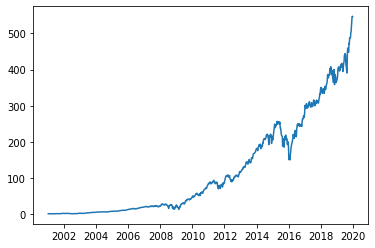

In [17]:
plt.plot(cumulative["date"],cumulative["pv"])

In [18]:
parameter

{'strategy': 'rolling',
 'value': True,
 'lookback': 60,
 'holding_period': 5,
 'floor': 0,
 'ceiling': 10,
 'volatility': 1}